<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-2-Figols/blob/main/Ejercicio_24_Oct(Coorrelacion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
from math import log, exp, sqrt, cos, acos, pi, sin, factorial
from statistics import mean, stdev, variance
from scipy.stats import norm, linregress, binom
import random as rnd
from random import random, gauss, expovariate, choice, seed
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import minimize
from numba import jit

from statsmodels.sandbox.stats import runs
from scipy.stats import kstest, uniform
from statsmodels.stats.diagnostic import acorr_ljungbox

# < > ∈ o ∉ |
#@jit(nopython=True)

KstestResult(statistic=0.00645506878942248, pvalue=0.7963912038203539, statistic_location=0.6674550687894225, statistic_sign=-1)
(-0.3761892732539693, 0.7067761894265591)
    lb_stat  lb_pvalue
1  0.207781   0.648512
2  3.672715   0.159397
3  6.185339   0.102933
4  6.459492   0.167361
5  9.211363   0.100925


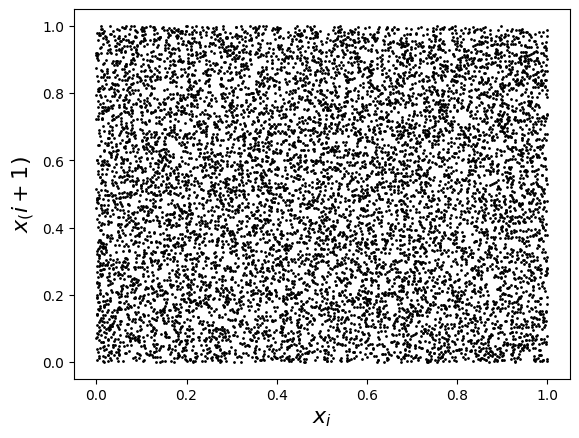

KstestResult(statistic=0.02359147012465318, pvalue=2.8807867978664333e-05, statistic_location=0.3783085298753468, statistic_sign=1)
(-4.991484902989548, 5.991686679168948e-07)
     lb_stat     lb_pvalue
1  90.999190  1.437310e-21
2  91.354468  1.454217e-20
3  92.019739  8.066649e-20
4  92.796028  3.352422e-19
5  95.222462  5.360957e-19


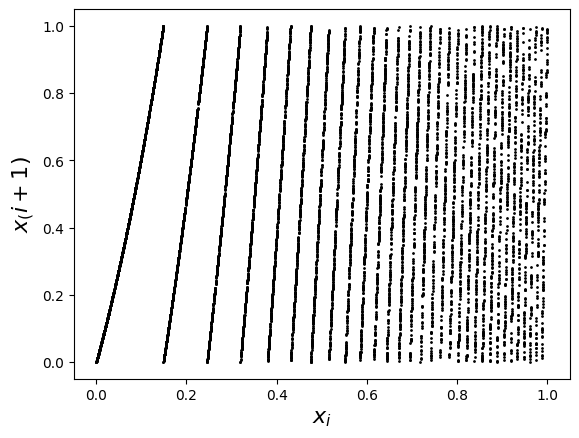

In [6]:
def gen1(n):
  x0=2345
  x=x0
  m=2**31
  a=65539
  c=2347
  l=[]
  for i in range(n):
    l.append(x/m)
    x=(a*x + c)%m
  return l
def gen2(n):
  x0=0.374567
  x=x0
  l=[]
  for i in range(n):
    l.append(x)
    x=(1+x)**5 - int((1+x)**5)
  return l

n=10000
for gen in [gen1, gen2]:
  l=gen(n)
  re1=kstest(l, "uniform", args=(0,1))
  print(re1)
  re2=runs.runstest_1samp(l, cutoff="mean", correction=False)
  print(re2)
  re3=acorr_ljungbox(l, lags=[1,2,3,4,5], return_df=True)
  print(re3)
  lx=[]
  ly=[]
  for i in range(n-1):
    lx.append(l[i])
    ly.append(l[i+1])
  plt.scatter(lx, ly, s=1, color="black")
  plt.xlabel(r"$x_i$", fontsize=16)
  plt.ylabel(r"$x_(i+1)$", fontsize=16)
  plt.show()